# IST 707 HW1 
## Lu Guo

## 1. Import the data

In [73]:
# import csv file
import pandas as pd
import numpy as np
path = "/Users/guolu/Documents/course/IST707/week3/supermarket_sales.csv"
df = pd.read_csv(path)

In [3]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Question 1: what’s the gross income distribution over different branches? 

In [74]:
# what’s the gross income distribution over different branches?
df.groupby('Branch')['gross income'].describe()


,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
A,340.0,14.874001,11.030477,0.6045,6.547125,11.46800,21.873375,49.49
B,332.0,15.232024,11.545122,0.8875,5.711250,12.04200,22.170750,48.69
C,328.0,16.052367,12.531470,0.5085,5.784500,12.92475,23.607375,49.65


In [108]:
# calculate the gross income for each branch
df.groupby('Branch')['gross income'].sum().reset_index()


,Branch,gross income
0,A,5057.1605
1,B,5057.0320
2,C,5265.1765


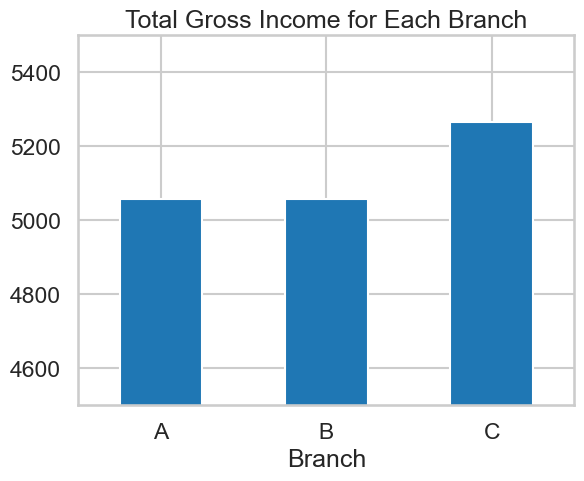

In [138]:
# draw a bar chart to show the gross income for each branch
import matplotlib.pyplot as plt
df.groupby('Branch')['gross income'].sum().plot(kind='bar',  ylim=(4500, 5500), title='Total Gross Income for Each Branch')
plt.xticks(rotation=0); # rotate the x-axis label
plt.show()

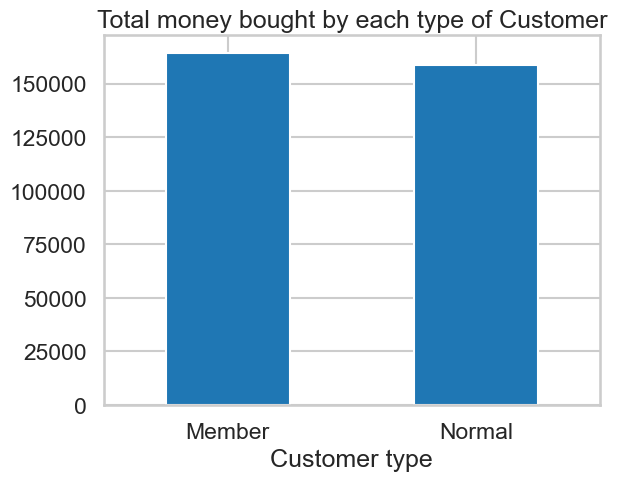

In [136]:
df.groupby('Customer type')['Total'].sum().plot(kind='bar', title='Total money bought by each type of Customer')
plt.xticks(rotation=0); # rotate the x-axis label
plt.show()

<Figure size 1000x600 with 0 Axes>

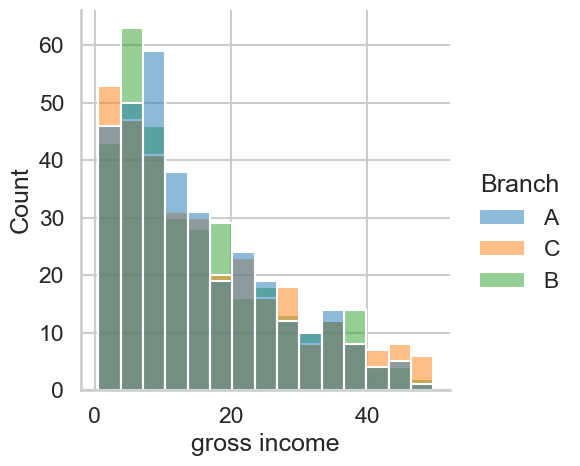

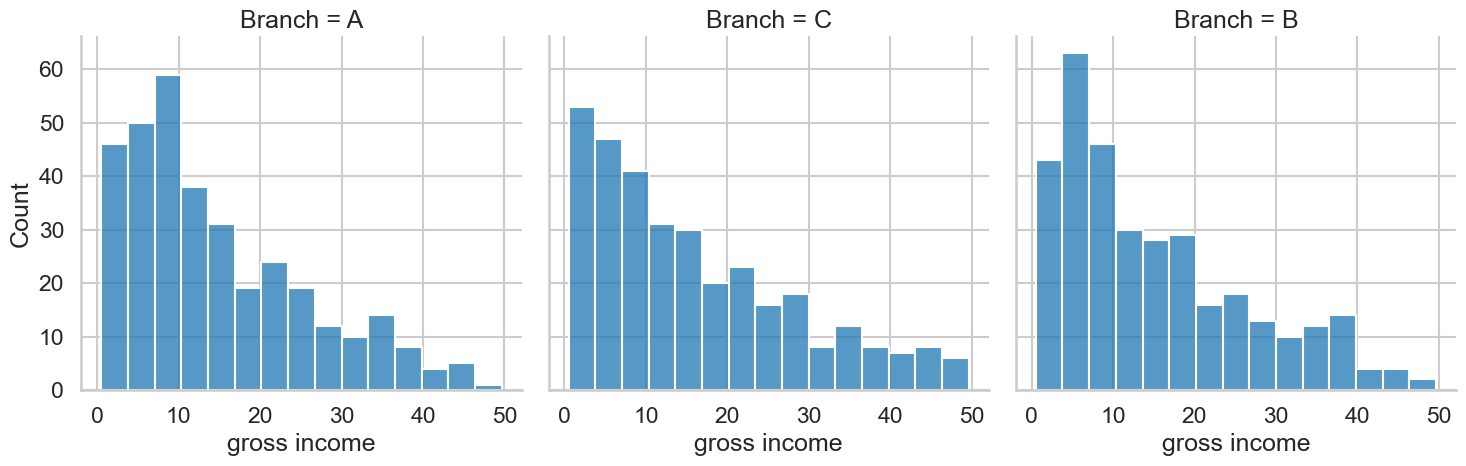

In [109]:
# draw three histograms to show the gross income for each branch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk') # talk means the font size is bigger
plt.figure(figsize=(10,6)) # set the figure size
sns.displot(df, x="gross income", hue="Branch")
sns.displot(df, x="gross income", col="Branch")
plt.show()



# Question 2: Are there gender differences in  on spending total money by each branch?

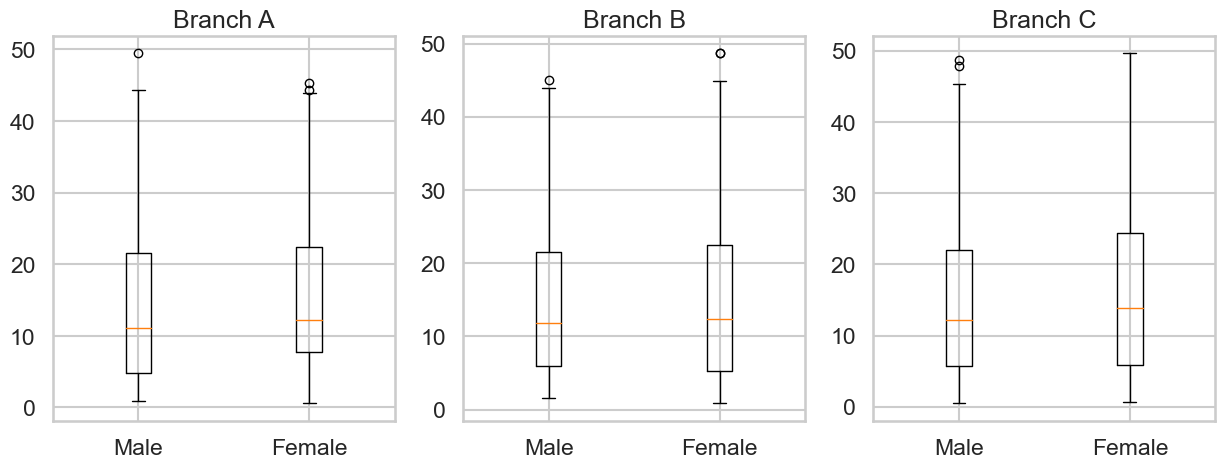

In [115]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, branch in enumerate(['A', 'B', 'C']):
    branch_df = df[df['Branch'] == branch]
    bp = ax[i].boxplot([branch_df[branch_df['Gender'] == 'Male']['gross income'], 
                      branch_df[branch_df['Gender'] == 'Female']['gross income']], 
                     labels=['Male', 'Female'])
    ax[i].set_title(f"Branch {branch}")
    
    # Add median line to help understand the distribution
    # mean = df['gross income'].median()
    # ax[i].hlines(mean, *plt.xlim(), color='blue', linestyle='--') 

plt.show()


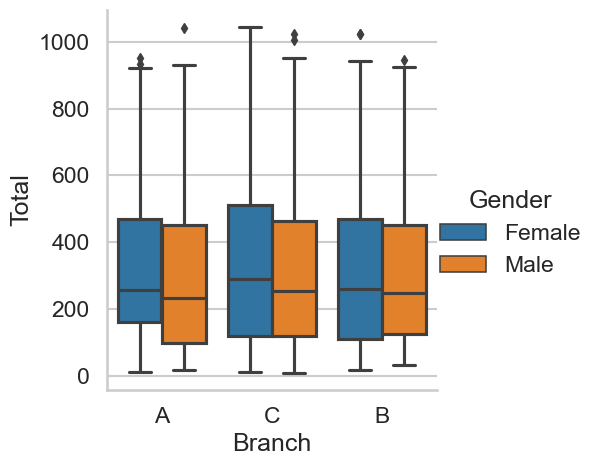

In [72]:
sns.catplot(data=df, x="Branch", y="Total", hue="Gender", kind="box")

## Question 3: Does different gender buy different products?

In [117]:
# create a table to display product line for different gender
df_product = df.groupby(['Product line','Branch']).agg({'Quantity':'count'}).reset_index()
df_product

,Product line,Branch,Quantity
0,Electronic accessories,A,60
1,Electronic accessories,B,55
2,Electronic accessories,C,55
3,Fashion accessories,A,51
4,Fashion accessories,B,62
5,Fashion accessories,C,65
6,Food and beverages,A,58
7,Food and beverages,B,50
8,Food and beverages,C,66
9,Health and beauty,A,47


<Figure size 1000x600 with 0 Axes>

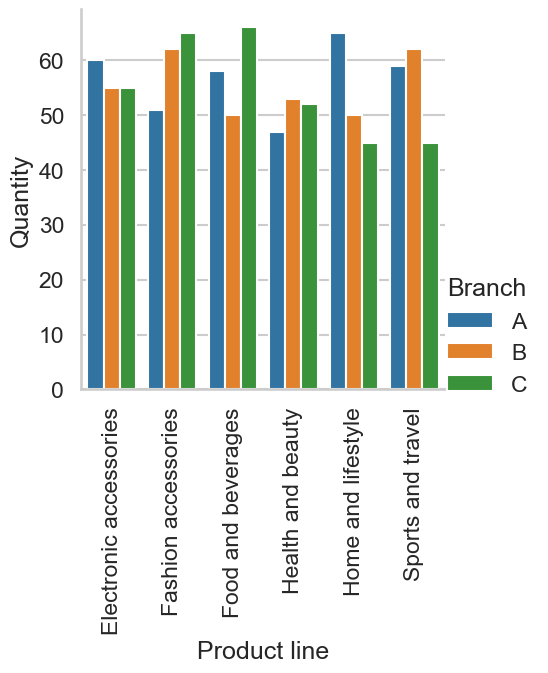

In [118]:
# draw a plot to display df_gender, x-axis display branch, y-axis display total by gender.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk') # talk means the font size is bigger

plt.figure(figsize=(10,6)) # set the figure size

sns.catplot(data=df_product, x="Product line", y="Quantity", hue="Branch", kind="bar")
plt.xticks(rotation=90); # rotate the x-axis label
# rotate the plot
plt.show()


In [127]:
df_pro = df.groupby(['Product line']).agg({'gross margin percentage':'mean'}).sort_values(by='gross margin percentage', ascending=False).reset_index()
df_pro


,Product line,gross margin percentage
0,Electronic accessories,4.761905
1,Fashion accessories,4.761905
2,Food and beverages,4.761905
3,Health and beauty,4.761905
4,Home and lifestyle,4.761905
5,Sports and travel,4.761905


## Question 4: Do rating influenced by shopping time, customer type, or payment?

In [94]:
# Group the Time column, if before 12pm, then it is morning, if after 6pm, then it is evening, else afternoon.
df['Time'] = df['Time'].astype(str)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Time'] = df['Time'].dt.hour
df['Shop Time'] = df['Time'].apply(lambda x: 'Morning' if x < 12 else ('Afternoon' if x < 18 else 'Evening'))
df['Shop Time'].head(5)

0    Afternoon
1      Morning
2    Afternoon
3      Evening
4      Morning
Name: Shop Time, dtype: object

<Figure size 1000x600 with 0 Axes>

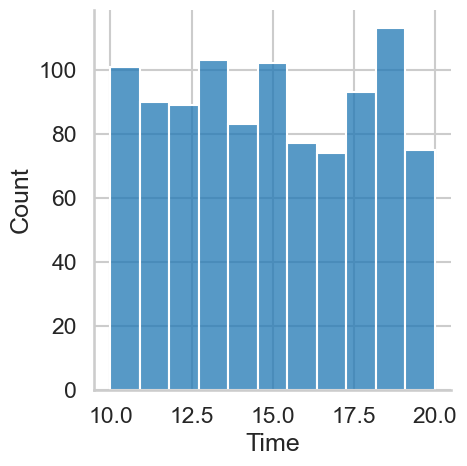

In [128]:
# create a histogram to show the count of orders for each hour
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk') # talk means the font size is bigger
plt.figure(figsize=(10,6)) # set the figure size
sns.displot(df, x="Time")
plt.show()

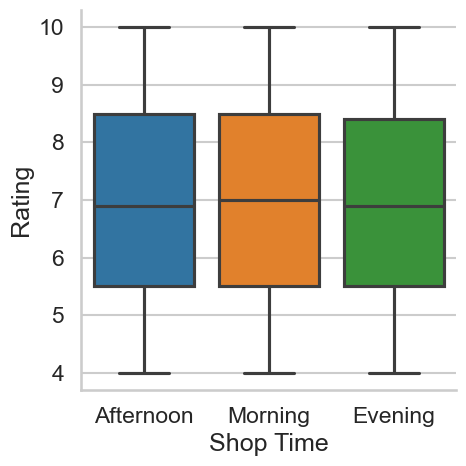

In [96]:
sns.catplot(data=df, x="Shop Time", y="Rating", kind="box")

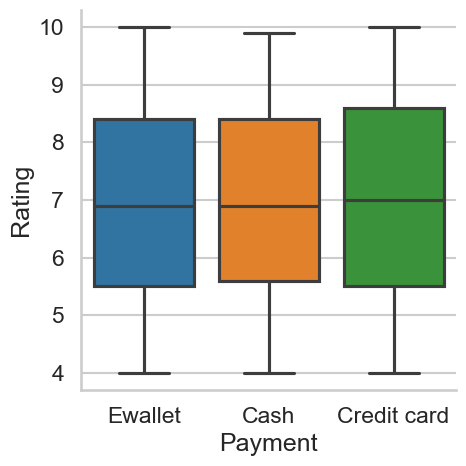

In [106]:
sns.catplot(data=df, x="Payment", y="Rating", kind="box")


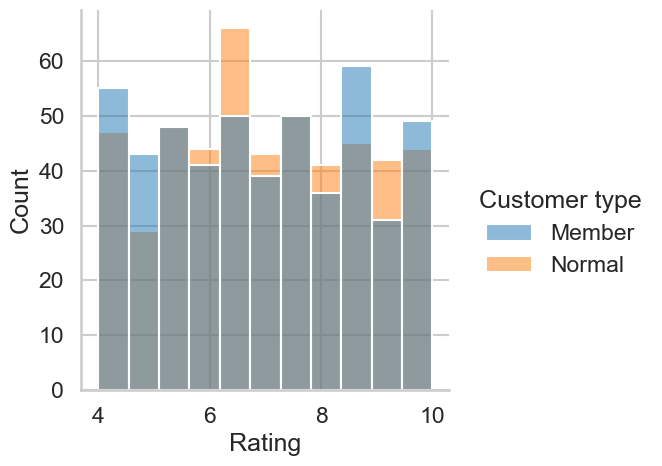

In [103]:
sns.displot(df, x="Rating", hue="Customer type")

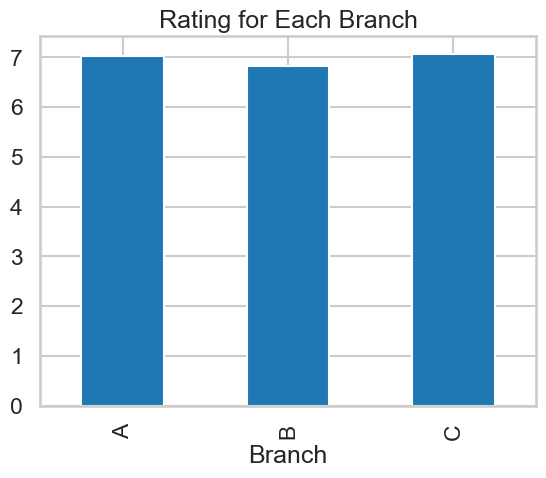

In [132]:
df.groupby('Branch')['Rating'].mean().plot(kind='bar', title='Rating for Each Branch')
plt.show()